In [1]:
#import important libraries
import numpy as np
import pandas as pd
from pandas import DataFrame

#import statistics libraries
import statistics
from scipy import stats
from statsmodels.formula.api import ols

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings #to ignore warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings('ignore')

In [2]:
#import CSV file
df = pd.read_csv("~/Documents/WGU/D214 - Data Analytics Graduate Capstone/Data Analytics Capstone Project.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124738 entries, 0 to 124737
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   ARBITRARY_ID                124738 non-null  int64 
 1   SERVICE_POD_NUMBER          124738 non-null  int64 
 2   CUSTOMER_COMMENTS           124738 non-null  int64 
 3   CITY                        124738 non-null  object
 4   STATE                       124738 non-null  object
 5   ASSIGNED_QUEUE              124738 non-null  object
 6   ORIGIN                      124738 non-null  object
 7   PRODUCT                     124738 non-null  object
 8   PRIORITY                    124738 non-null  object
 9   PRIMARY_CUSTOMER_CONDITION  124738 non-null  object
 10  SERVICE_LEVEL               124738 non-null  object
 11  CUSTOMER_IMPACT             124738 non-null  object
 12  CASE_DURATION               124738 non-null  object
 13  CREATEDDATE                 1

In [4]:
#Removing columns not needed for this exercise
df.drop(['ARBITRARY_ID', 'CITY', 'STATE', 'CASE_DURATION', 'CREATEDDATE', 'CLOSEDDATE',
        'CLOSING_FAULT', 'CLOSING_ISSUE', 'CLOSING_RESOLUTION', 'ACTION_CODE', 'CAUSE_CODE', 'CLASS_ITEM_CODE'], 
               axis=1, 
               inplace=True)

In [ ]:
# Calculate the number of null values in each column
null_counts = df.isnull().sum()

# Filter out columns with no null values (optional)
null_counts = null_counts[null_counts > 0]

# Display the result
print("Columns with null values and their counts:")
print(null_counts)

In [ ]:
# Specify the column you want to analyze
column_name = 'CLASS_ITEM_CODE'

# Get unique values with their counts
unique_counts = df[column_name].value_counts()

# Display the result
print(f"Unique values and their counts in column '{column_name}':")
print(unique_counts)

In [ ]:
#Remove NaN rows from CLASS_ITEM_CODE column
df = df.dropna()

In [ ]:
# Calculate the number of null values in each column
null_counts = df.isnull().sum()

# Filter out columns with no null values (optional)
null_counts = null_counts[null_counts > 0]

# Display the result
print("Columns with null values and their counts:")
print(null_counts)

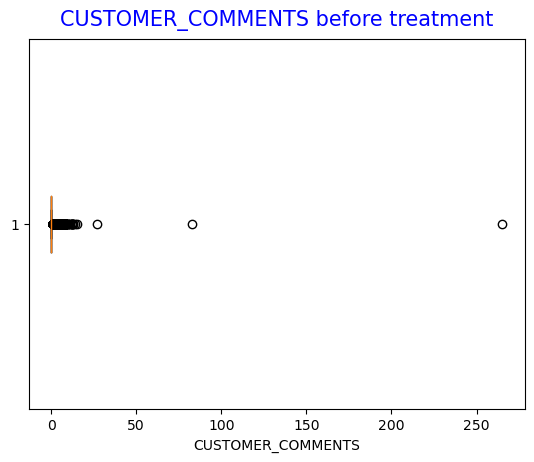

In [5]:
#detect Income outliers before treatment
plt.boxplot(df['CUSTOMER_COMMENTS'], vert=False)
plt.xlabel('CUSTOMER_COMMENTS')
plt.title('CUSTOMER_COMMENTS before treatment', fontsize=15, pad=10, color='blue')
plt.show()

In [6]:
#Treating outliers
df['CUSTOMER_COMMENTS'] = np.where(df['CUSTOMER_COMMENTS'] > 25, np.nan, df['CUSTOMER_COMMENTS'])
df['CUSTOMER_COMMENTS'].fillna(df['CUSTOMER_COMMENTS'].median(), inplace=True)

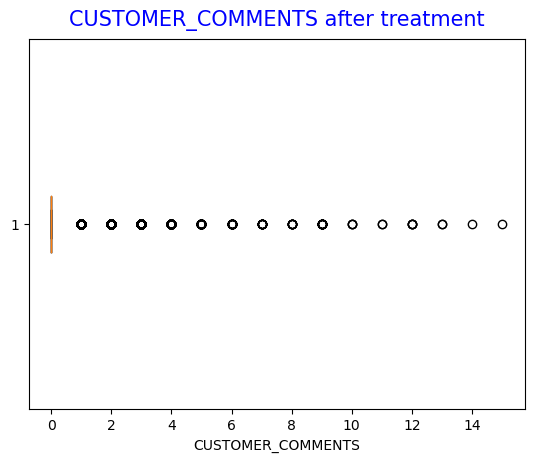

In [7]:
#detect Income outliers after treatment
plt.boxplot(df['CUSTOMER_COMMENTS'], vert=False)
plt.xlabel('CUSTOMER_COMMENTS')
plt.title('CUSTOMER_COMMENTS after treatment', fontsize=15, pad=10, color='blue')
plt.show()

In [8]:
#Define a dictionary to rename ASSIGNED_QUEUE -- this will help to reduce dimensionality

queue_dict = {
    'SA Advanced OS Support': 'AdvOSSpt',
    'SA Automation Hold': 'Automation',
    'SA Customer Owned Automation Hold': 'Automation',
    'SA Customer Power Outage': 'Automation',
    'SA Customer Request Automation Hold': 'Automation',
    'SA Disco Automation Hold': 'Automation',
    'SA Order Related Automation Hold': 'Automation',
    'SA Partner Standard Automation Hold': 'Automation',
    'SA SDWAN Automation Hold': 'Automation',
    'SA Simplex Automation Hold': 'Automation',
    'SA Unresponsive Customer Automation Hold': 'Automation',
    'SA Wireless Automation Hold': 'Automation',
    'SA Transport HB': 'TransHB',
    'SA Complex NOC': 'Complex',
    'SA SMB Complex': 'Complex',
    'SA CSOC SASE': 'CSOC',
    'SA CSOC SIEM': 'CSOC',
    'SA CSOC Support': 'CSOC',
    'SA Outage Child': 'Outage',
    'SA Outage Lead': 'Outage',
    'SA Premier Managed Network Solutions': 'MNS',
    'SA Prime Managed Network Solutions': 'MNS',
    'SA Select Managed Network Solutions': 'MNS',
    'SA Proactive Alarm': 'Proactive',
    'SA Proactive Hold': 'Proactive',
    'SA Proactive Support': 'Proactive',
    'SA TSM': 'TSM',
    'SA WSL Event': 'WSL',
    'SA WSL Waves': 'WSL'
}

#rename values in the ASSIGNED_QUEUE column
df['ASSIGNED_QUEUE'] = df['ASSIGNED_QUEUE'].replace(queue_dict)

In [9]:
#Define a dictionary to rename ORIGIN 

origin_dict = {
    'Alarm - SD WAN': 'SDWAN',
    'Alarm - Customer Netcool': 'Cust_Netcool',
    'Alarm - Core Netcool': 'Core_Netcool',
    'Alarm - SIEM': 'SIEM'
}

#rename values in the ASSIGNED_QUEUE column
df['ORIGIN'] = df['ORIGIN'].replace(origin_dict)

In [10]:
#Define a dictionary to rename PRODUCT

product_dict = {
    'LAN Services': 'LAN',
    'SD-WAN C': 'SDWAN_C',
    'SD-WAN F': 'SDWAN_F',
    'SD-WAN V': 'SDWAN_V',
    'Security-Firewall': 'FIREWALL',
    'Security-C': 'Security_C',
    'Security-S': 'SIEM'
}

#rename values in the ASSIGNED_QUEUE column
df['PRODUCT'] = df['PRODUCT'].replace(product_dict)

In [11]:
#Define a dictionary to rename SERVICE_LEVEL

svclvl_dict = {
    'Mid Market': 'Mid'
}

#rename values in the ASSIGNED_QUEUE column
df['SERVICE_LEVEL'] = df['SERVICE_LEVEL'].replace(svclvl_dict)

In [12]:
#Define a dictionary to rename SERVICE_STATUS

svcst_dict = {
    'Out of Service': 'OOS',
    'In Service': 'IS'
}

#rename values in the ASSIGNED_QUEUE column
df['SERVICE_STATUS'] = df['SERVICE_STATUS'].replace(svcst_dict)

In [13]:
#Define a dictionary to rename ISSUE

issue_dict = {
    'Service Impairment': 'Impaired',
    'Service Down': 'Down'
}

#rename values in the ASSIGNED_QUEUE column
df['ISSUE'] = df['ISSUE'].replace(issue_dict)

In [14]:
#Define a dictionary to rename OPEN_TIER_1

ot1_dict = {
    'LAN Services': 'LAN',
    'SD-WAN - Data': 'SDWAN_D',
    'SD-WAN Data': 'SDWAN_D',
    'SD-WAN C': 'SDWAN_C',
    'SD-WAN F': 'SDWAN_F',
    'SD-WAN V': 'SDWAN_V',
    'Security-CSOC': 'Security_CSOC'
}

#rename values in the ASSIGNED_QUEUE column
df['OPEN_TIER_1'] = df['OPEN_TIER_1'].replace(ot1_dict)

In [15]:
#Define a dictionary to rename OPEN_TIER_2

ot2_dict = {
    'Ethernet Circuit': 'ETH',
    'High Bandwidth': 'HB',
    'LAN - Switch': 'SWITCH',
    'LAN - Access Point': 'AP'
}

#rename values in the ASSIGNED_QUEUE column
df['OPEN_TIER_2'] = df['OPEN_TIER_2'].replace(ot2_dict)

In [16]:
#Define a dictionary to rename OPEN_TIER_3

ot3_dict = {
    'Circuit Jitter': 'JL_PL',
    'Circuit Latency': 'JL_PL',
    'Circuit Packet Loss': 'JL_PL',
    'Circuit Proactive Down': 'Pro_Ckt',
    'Circuit Down': 'Ckt_Down',
    'Customer Owned Circuit Degraded': 'Cust_Deg',
    'Customer Owned Circuit Down': 'Cust_Down',
    'Customer Power Outage': 'Cust_Power',
    'Customer-Ordered Circuit Degraded': 'Cust_Deg',
    'Customer-Ordered Circuit Down': 'Cust_Down',
    'Device Down': 'Dev_Down',
    'Impaired - w/ Redundant Link Down': 'SDWAN_HA',
    'Outage Data': 'Outage_Data',
    'Proactive 4g Wireless Circuit': 'Pro_4GW',
    'Proactive Virtual VCE Down': 'Pro_VCE',
    'Proactive Circuit Down': 'Pro_Ckt',
    'Proactive Down': 'Pro',
    'Proactive Down - HA': 'Pro_HA',
    'Proactive Down - Multiple Underlay': 'Pro_Multi',
    'Service Proactive Down': 'Pro_Svc',
    'Severity 3-Alarm': 'Sev3'
}

#rename values in the ASSIGNED_QUEUE column
df['OPEN_TIER_3'] = df['OPEN_TIER_3'].replace(ot3_dict)

In [17]:
df.rename(columns={'OPEN_TIER_1': 'OT1', 
                   'OPEN_TIER_2': 'OT2', 
                   'OPEN_TIER_3': 'OT3',
                  'ASSIGNED_QUEUE': 'QUEUE',
                  'ALARM_STATUS': 'ALARM',
                  'SERVICE_LEVEL': 'SVCLVL',
                  'SERVICE_STATUS': 'SVCST'}, inplace=True)

In [18]:
## Re-expression of Categorical Variables

## Ordinal Categorical

#ordinal encoding via dictionary
df['PRIORITY_NUMERIC'] = df['PRIORITY']
dict_priority =  {"PRIORITY_NUMERIC": {"Low": 1, "Medium": 2, "High": 3, "Critical": 4}}
df.replace(dict_priority, inplace=True)

#print before & after
print("PRIORITY_NUMERIC unique values are", df.PRIORITY_NUMERIC.unique())
print(dict_priority)
print("")

#ordinal encoding via dictionary
df['CUST_COND_NUMERIC'] = df['PRIMARY_CUSTOMER_CONDITION']
dict_cust_cond =  {"CUST_COND_NUMERIC": {"Lost": 1, "At Risk": 2, "Save Motion": 3, "Stable": 4, "Growth": 5}}
df.replace(dict_cust_cond, inplace=True)

#print before & after
print("CUST_COND_NUMERIC unique values are", df.CUST_COND_NUMERIC.unique())
print(dict_cust_cond)
print("")

#ordinal encoding via dictionary
df['CUST_IMP_NUMERIC'] = df['CUSTOMER_IMPACT']
dict_cust_imp =  {"CUST_IMP_NUMERIC": {"Sev 1": 1, "Sev 2": 2, "Sev 3": 3, "Sev 4": 4}}
df.replace(dict_cust_imp, inplace=True)

#print before & after
print("CUST_IMP_NUMERIC unique values are", df.CUST_IMP_NUMERIC.unique())
print(dict_cust_imp)
print("")

## Nominal Categorical

prefix_list = ['QUEUE', 'ORIGIN', 'PRODUCT', 'ALARM', 'SVCLVL', 
               'OT1', 'OT2', 'OT3', 'ISSUE', 'SVCST']

# save original dataframe
original_df = df

# overwrite df dataframe with dummy variables
df = pd.get_dummies(df, 
                    prefix=prefix_list, 
                    prefix_sep='_', 
                    dummy_na=False,
                    drop_first=True,
                    columns=prefix_list)

#show how many new columns/variables
print("Orig Rows: ", original_df.shape[0], "Columns: ", original_df.shape[1])
print("New Rows:  ", df.shape[0], "Columns: ", df.shape[1])

PRIORITY_NUMERIC unique values are [4 3 2 1]
{'PRIORITY_NUMERIC': {'Low': 1, 'Medium': 2, 'High': 3, 'Critical': 4}}

CUST_COND_NUMERIC unique values are [2 1 5 4 3]
{'CUST_COND_NUMERIC': {'Lost': 1, 'At Risk': 2, 'Save Motion': 3, 'Stable': 4, 'Growth': 5}}

CUST_IMP_NUMERIC unique values are [1 2 3 4]
{'CUST_IMP_NUMERIC': {'Sev 1': 1, 'Sev 2': 2, 'Sev 3': 3, 'Sev 4': 4}}

Orig Rows:  124738 Columns:  18
New Rows:   124738 Columns:  69


In [ ]:
original_df.info()

In [ ]:
# Set pandas options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set a wide enough width to avoid wrapping

# Display column names in list
column_names = df.columns
column_names_list = list(column_names)
print("All Column Names:")
print(column_names_list)

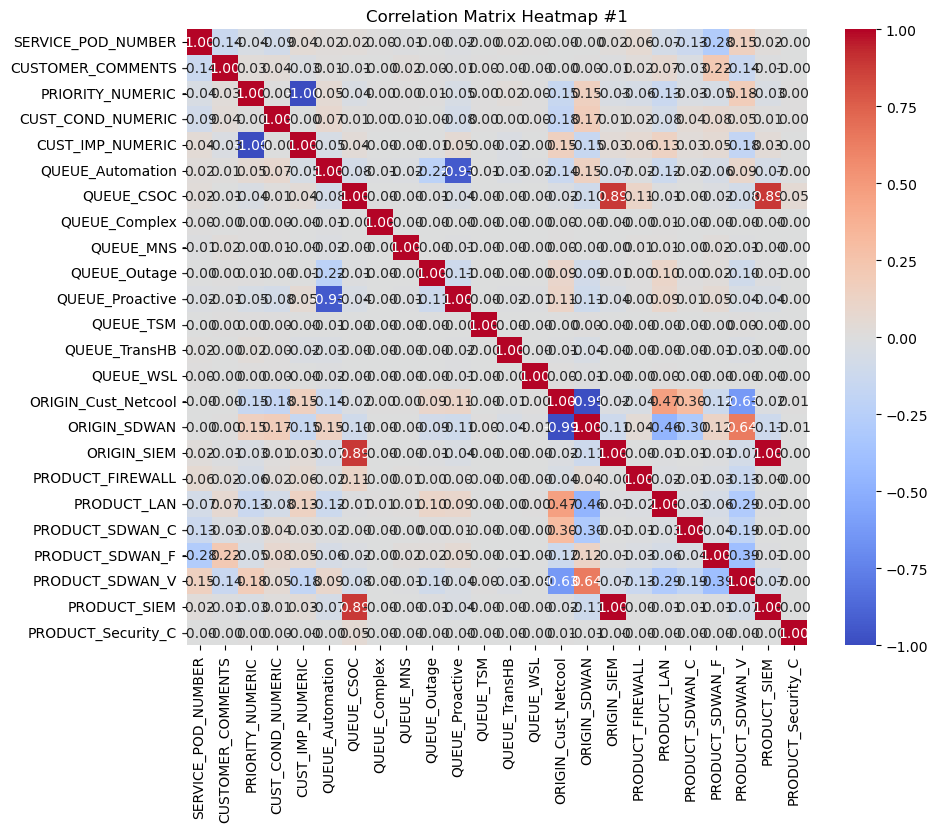

In [19]:
# Calculate the correlation matrix
correlation_matrix = df[['SERVICE_POD_NUMBER', 'CUSTOMER_COMMENTS', 'PRIORITY', 'PRIMARY_CUSTOMER_CONDITION', 
                         'CUSTOMER_IMPACT', 'PRIORITY_NUMERIC', 'CUST_COND_NUMERIC', 'CUST_IMP_NUMERIC', 
                         'QUEUE_Automation', 'QUEUE_CSOC', 'QUEUE_Complex', 'QUEUE_MNS', 'QUEUE_Outage', 
                         'QUEUE_Proactive', 'QUEUE_TSM', 'QUEUE_TransHB', 'QUEUE_WSL', 'ORIGIN_Cust_Netcool', 
                         'ORIGIN_SDWAN', 'ORIGIN_SIEM', 'PRODUCT_FIREWALL', 'PRODUCT_LAN', 'PRODUCT_SDWAN_C', 
                         'PRODUCT_SDWAN_F', 'PRODUCT_SDWAN_V', 'PRODUCT_SIEM', 'PRODUCT_Security_C']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap #1")
plt.show()

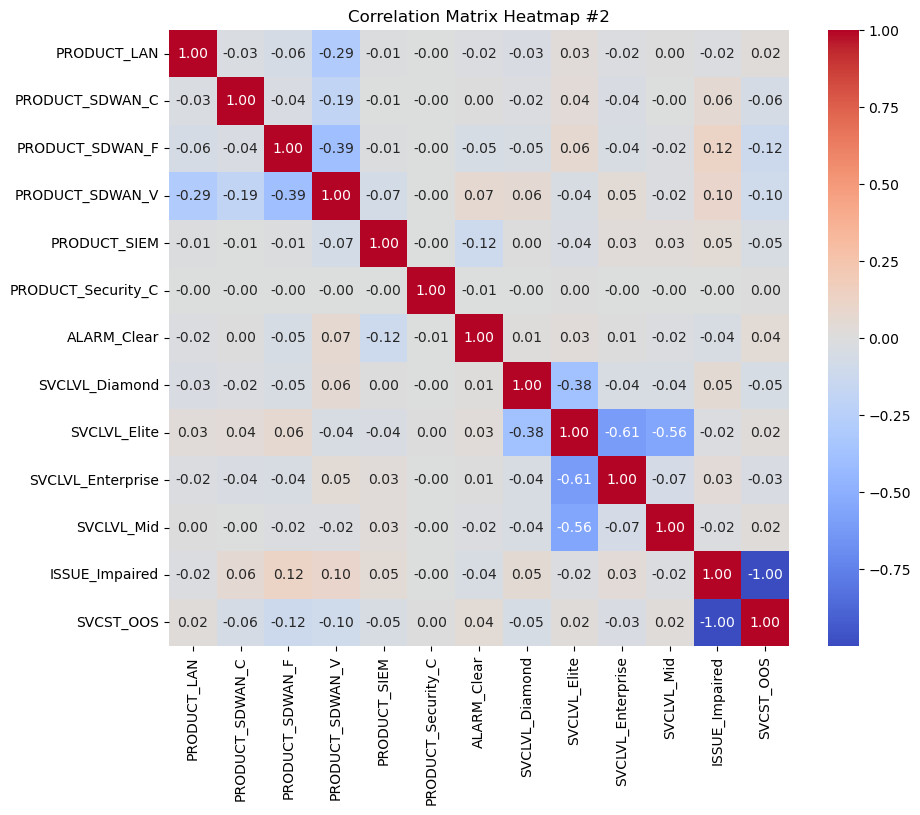

In [20]:
# Calculate the correlation matrix
correlation_matrix = df[['PRODUCT_LAN', 'PRODUCT_SDWAN_C', 'PRODUCT_SDWAN_F', 'PRODUCT_SDWAN_V', 'PRODUCT_SIEM', 
                         'PRODUCT_Security_C', 'ALARM_Clear', 'SVCLVL_Diamond', 'SVCLVL_Elite', 'SVCLVL_Enterprise', 
                         'SVCLVL_Mid', 'ISSUE_Impaired', 'SVCST_OOS']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap #2")
plt.show()

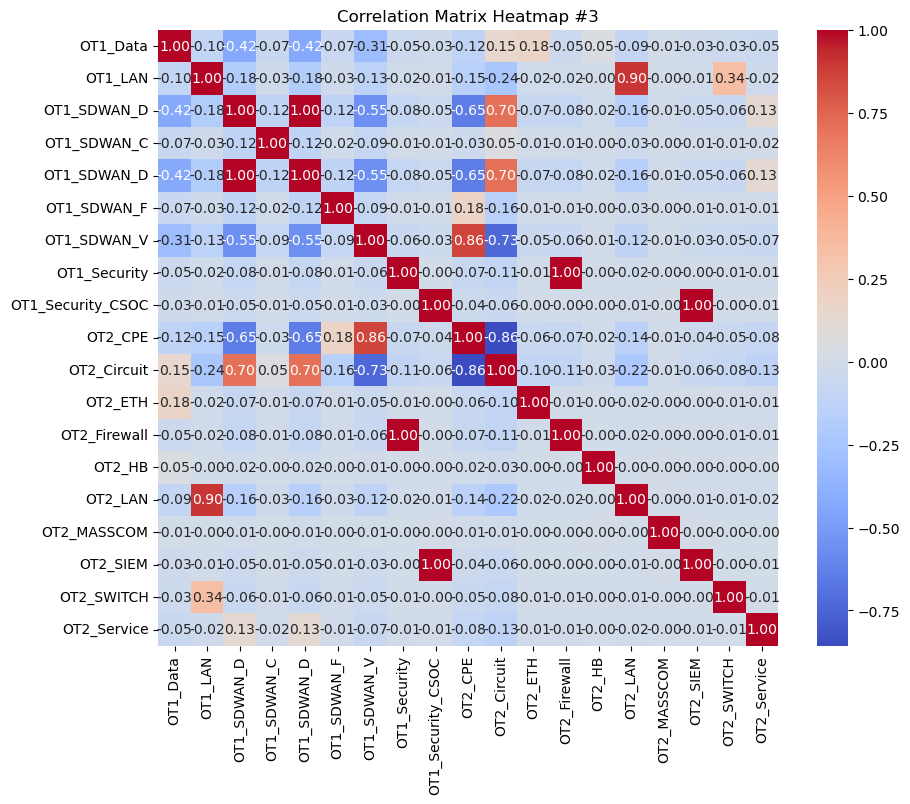

In [21]:
# Calculate the correlation matrix
correlation_matrix = df[['OT1_Data', 'OT1_LAN', 'OT1_SDWAN_D', 'OT1_SDWAN_C', 'OT1_SDWAN_D', 
                         'OT1_SDWAN_F', 'OT1_SDWAN_V', 'OT1_Security', 'OT1_Security_CSOC', 'OT2_CPE', 'OT2_Circuit', 
                         'OT2_ETH', 'OT2_Firewall', 'OT2_HB', 'OT2_LAN', 'OT2_MASSCOM', 'OT2_SIEM', 'OT2_SWITCH', 
                         'OT2_Service']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap #3")
plt.show()

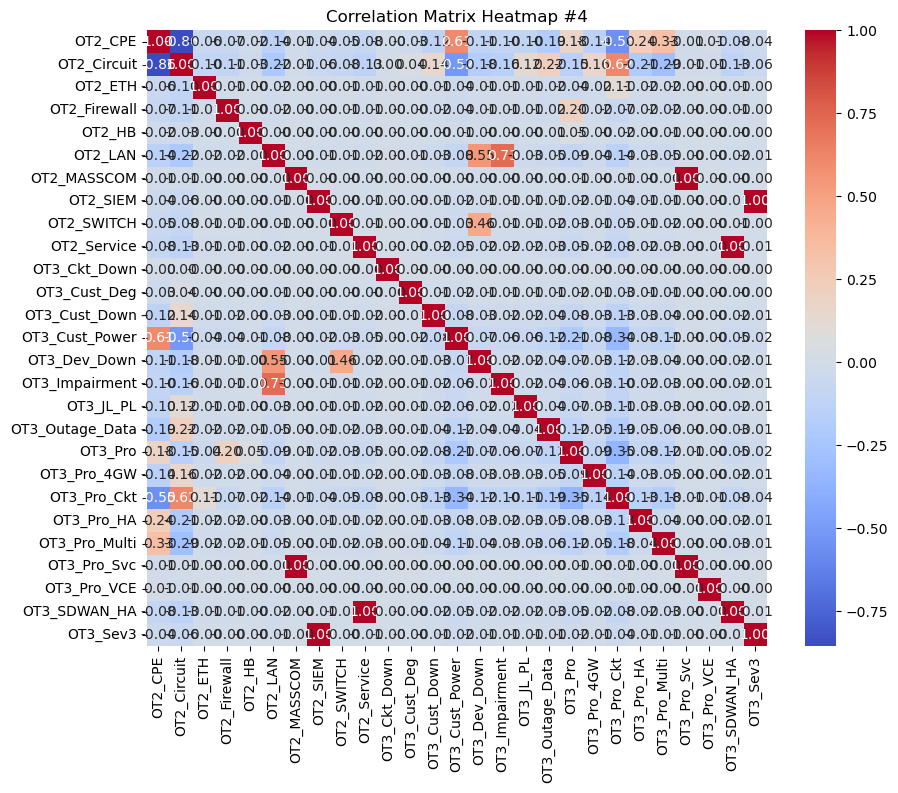

In [22]:
# Calculate the correlation matrix
correlation_matrix = df[['OT2_CPE', 'OT2_Circuit', 'OT2_ETH', 'OT2_Firewall', 'OT2_HB', 'OT2_LAN', 'OT2_MASSCOM', 
                         'OT2_SIEM', 'OT2_SWITCH', 'OT2_Service', 'OT3_Ckt_Down', 'OT3_Cust_Deg', 'OT3_Cust_Down', 
                         'OT3_Cust_Power', 'OT3_Dev_Down', 'OT3_Impairment', 'OT3_JL_PL', 'OT3_Outage_Data', 
                         'OT3_Pro', 'OT3_Pro_4GW', 'OT3_Pro_Ckt', 'OT3_Pro_HA', 'OT3_Pro_Multi', 'OT3_Pro_Svc', 
                         'OT3_Pro_VCE', 'OT3_SDWAN_HA', 'OT3_Sev3']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap #4")
plt.show()

In [23]:
#Removing multicollinear columns not needed for this exercise
df.drop(['ORIGIN_SIEM', 'ISSUE_Impaired', 'OT2_Firewall', 'OT2_SIEM',
        'OT3_Pro_Svc', 'OT2_Service'], 
               axis=1, 
               inplace=True)

In [ ]:
# Display column names in list
column_names = df.columns
column_names_list = list(column_names)
print("All Column Names:")
print(column_names_list)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['SERVICE_POD_NUMBER', 'CUSTOMER_COMMENTS', 'PRIORITY_NUMERIC', 'CUST_COND_NUMERIC', 
                         'CUST_IMP_NUMERIC', 'QUEUE_Automation', 'QUEUE_CSOC', 'QUEUE_Complex', 'QUEUE_MNS', 
                         'QUEUE_Outage', 'QUEUE_Proactive', 'QUEUE_SA TSM', 'QUEUE_TransHB', 'QUEUE_WSL', 
                         'ORIGIN_Cust_Netcool', 'ORIGIN_SDWAN', 'PRODUCT_FIREWALL', 'PRODUCT_LAN', 'PRODUCT_SDWAN_C', 
                         'PRODUCT_SDWAN_F', 'PRODUCT_SDWAN_V', 'PRODUCT_SIEM', 'PRODUCT_Security-C', 'ALARM_Clear', 
                         'SVCLVL_Diamond', 'SVCLVL_Elite', 'SVCLVL_Enterprise', 'SVCLVL_Mid', 'OT1_Data', 'OT1_LAN',
                         'OT1_SD-WAN Data', 'OT1_SDWAN_C', 'OT1_SDWAN_D', 'OT1_SDWAN_F', 'OT1_SDWAN_V', 'OT1_Security',
                         'OT1_Security-CSOC', 'OT2_CPE', 'OT2_Circuit', 'OT2_ETH', 'OT2_HB', 'OT2_LAN', 'OT2_MASSCOM',
                         'OT2_SWITCH', 'OT3_Ckt_Down', 'OT3_Cust_Deg', 'OT3_Cust_Down', 'OT3_Cust_Power', 'OT3_Dev_Down', 
                         'OT3_Impairment', 'OT3_JL_PL', 'OT3_Outage_Data', 'OT3_Pro', 'OT3_Pro_4GW', 'OT3_Pro_Ckt', 
                         'OT3_Pro_HA', 'OT3_Pro_Multi', 'OT3_Pro_VCE', 'OT3_SDWAN_HA', 'OT3_Sev-3', 'SVCST_OOS']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap for ALL")
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.dtypes)

In [24]:
## A bit of housecleaning on variables

#update dtype
df['CUSTOMER_COMMENTS'] = df['CUSTOMER_COMMENTS'].astype('int64')
df['QUEUE_Automation'] = df['QUEUE_Automation'].astype('int64')
df['QUEUE_CSOC'] = df['QUEUE_CSOC'].astype('int64')
df['QUEUE_Complex'] = df['QUEUE_Complex'].astype('int64')
df['QUEUE_MNS'] = df['QUEUE_MNS'].astype('int64')
df['QUEUE_Outage'] = df['QUEUE_Outage'].astype('int64')
df['QUEUE_Proactive'] = df['QUEUE_Proactive'].astype('int64')
df['QUEUE_TSM'] = df['QUEUE_TSM'].astype('int64')
df['QUEUE_TransHB'] = df['QUEUE_TransHB'].astype('int64')
df['QUEUE_WSL'] = df['QUEUE_WSL'].astype('int64')
df['ORIGIN_Cust_Netcool'] = df['ORIGIN_Cust_Netcool'].astype('int64')
df['ORIGIN_SDWAN'] = df['ORIGIN_SDWAN'].astype('int64')
df['PRODUCT_FIREWALL'] = df['PRODUCT_FIREWALL'].astype('int64')
df['PRODUCT_LAN'] = df['PRODUCT_LAN'].astype('int64')
df['PRODUCT_SDWAN_C'] = df['PRODUCT_SDWAN_C'].astype('int64')
df['PRODUCT_SDWAN_F'] = df['PRODUCT_SDWAN_F'].astype('int64')
df['PRODUCT_SDWAN_V'] = df['PRODUCT_SDWAN_V'].astype('int64')
df['PRODUCT_SIEM'] = df['PRODUCT_SIEM'].astype('int64')
df['PRODUCT_Security_C'] = df['PRODUCT_Security_C'].astype('int64')
df['ALARM_Clear'] = df['ALARM_Clear'].astype('int64')
df['SVCLVL_Diamond'] = df['SVCLVL_Diamond'].astype('int64')
df['SVCLVL_Elite'] = df['SVCLVL_Elite'].astype('int64')
df['SVCLVL_Enterprise'] = df['SVCLVL_Enterprise'].astype('int64')
df['SVCLVL_Mid'] = df['SVCLVL_Mid'].astype('int64')
df['SVCST_OOS'] = df['SVCST_OOS'].astype('int64')
df['OT1_Data'] = df['OT1_Data'].astype('int64')
df['OT1_LAN'] = df['OT1_LAN'].astype('int64')
df['OT1_SDWAN_C'] = df['OT1_SDWAN_C'].astype('int64')
df['OT1_SDWAN_D'] = df['OT1_SDWAN_D'].astype('int64')
df['OT1_SDWAN_F'] = df['OT1_SDWAN_F'].astype('int64')
df['OT1_SDWAN_V'] = df['OT1_SDWAN_V'].astype('int64')
df['OT1_Security'] = df['OT1_Security'].astype('int64')
df['OT1_Security_CSOC'] = df['OT1_Security_CSOC'].astype('int64')
df['OT2_CPE'] = df['OT2_CPE'].astype('int64')
df['OT2_Circuit'] = df['OT2_Circuit'].astype('int64')
df['OT2_ETH'] = df['OT2_ETH'].astype('int64')
df['OT2_HB'] = df['OT2_HB'].astype('int64')
df['OT2_LAN'] = df['OT2_LAN'].astype('int64')
df['OT2_MASSCOM'] = df['OT2_MASSCOM'].astype('int64')
df['OT2_SWITCH'] = df['OT2_SWITCH'].astype('int64')
df['OT3_Ckt_Down'] = df['OT3_Ckt_Down'].astype('int64')
df['OT3_Cust_Deg'] = df['OT3_Cust_Deg'].astype('int64')
df['OT3_Cust_Down'] = df['OT3_Cust_Down'].astype('int64')
df['OT3_Cust_Power'] = df['OT3_Cust_Power'].astype('int64')
df['OT3_Dev_Down'] = df['OT3_Dev_Down'].astype('int64')
df['OT3_Impairment'] = df['OT3_Impairment'].astype('int64')
df['OT3_JL_PL'] = df['OT3_JL_PL'].astype('int64')
df['OT3_Outage_Data'] = df['OT3_Outage_Data'].astype('int64')
df['OT3_Pro'] = df['OT3_Pro'].astype('int64')
df['OT3_Pro_Ckt'] = df['OT3_Pro_Ckt'].astype('int64')
df['OT3_Pro_4GW'] = df['OT3_Pro_4GW'].astype('int64')
df['OT3_Pro_HA'] = df['OT3_Pro_HA'].astype('int64')
df['OT3_Pro_Multi'] = df['OT3_Pro_Multi'].astype('int64')
df['OT3_Pro_VCE'] = df['OT3_Pro_VCE'].astype('int64')
df['OT3_SDWAN_HA'] = df['OT3_SDWAN_HA'].astype('int64')
df['OT3_Sev3'] = df['OT3_Sev3'].astype('int64')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.dtypes

In [ ]:
model_alarm_clear = ols('ALARM_Clear ~ SERVICE_POD_NUMBER + CUSTOMER_COMMENTS + PRIORITY_NUMERIC + CUST_COND_NUMERIC + CUST_IMP_NUMERIC + QUEUE_Automation + QUEUE_CSOC + QUEUE_Complex + QUEUE_MNS + QUEUE_Outage + QUEUE_Proactive + QUEUE_TSM + QUEUE_TransHB + QUEUE_WSL + ORIGIN_Cust_Netcool + ORIGIN_SDWAN + PRODUCT_FIREWALL + PRODUCT_LAN + PRODUCT_SDWAN_C + PRODUCT_SDWAN_F + PRODUCT_SDWAN_V + PRODUCT_SIEM + PRODUCT_Security_C + SVCLVL_Diamond + SVCLVL_Elite + SVCLVL_Enterprise + SVCLVL_Mid + OT1_Data + OT1_LAN + OT1_SDWAN_C + OT1_SDWAN_D + OT1_SDWAN_F + OT1_SDWAN_V + OT1_Security + OT1_Security_CSOC + OT2_CPE + OT2_Circuit + OT2_ETH + OT2_HB + OT2_LAN + OT2_MASSCOM + OT2_SWITCH + OT3_Ckt_Down + OT3_Cust_Deg + OT3_Cust_Down + OT3_Cust_Power + OT3_Dev_Down + OT3_Impairment + OT3_JL_PL + OT3_Outage_Data + OT3_Pro + OT3_Pro_4GW + OT3_Pro_Ckt + OT3_Pro_HA + OT3_Pro_Multi + OT3_Pro_VCE + OT3_SDWAN_HA + OT3_Sev3 + SVCST_OOS', data=df).fit()
print(model_alarm_clear.summary())

In [25]:
## Checking for Multicollinearity

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = df[['SERVICE_POD_NUMBER', 'CUSTOMER_COMMENTS', 'PRIORITY_NUMERIC', 'CUST_COND_NUMERIC', 'CUST_IMP_NUMERIC', 
        'QUEUE_Automation', 'QUEUE_CSOC', 'QUEUE_Complex', 'QUEUE_MNS', 'QUEUE_Outage', 'QUEUE_Proactive', 'QUEUE_TSM', 
        'QUEUE_TransHB', 'QUEUE_WSL', 'ORIGIN_Cust_Netcool', 'ORIGIN_SDWAN', 'PRODUCT_FIREWALL', 'PRODUCT_LAN', 
        'PRODUCT_SDWAN_C', 'PRODUCT_SDWAN_F', 'PRODUCT_SDWAN_V', 'PRODUCT_SIEM', 'PRODUCT_Security_C', 'ALARM_Clear', 
        'SVCLVL_Diamond', 'SVCLVL_Elite', 'SVCLVL_Enterprise', 'SVCLVL_Mid', 'OT1_Data', 'OT1_LAN', 'OT1_SDWAN_C', 
        'OT1_SDWAN_D', 'OT1_SDWAN_F', 'OT1_SDWAN_V', 'OT1_Security', 'OT1_Security_CSOC', 'OT2_CPE', 'OT2_Circuit', 
        'OT2_ETH', 'OT2_HB', 'OT2_LAN', 'OT2_MASSCOM', 'OT2_SWITCH', 'OT3_Ckt_Down', 'OT3_Cust_Deg', 'OT3_Cust_Down', 
        'OT3_Cust_Power', 'OT3_Dev_Down', 'OT3_Impairment', 'OT3_JL_PL', 'OT3_Outage_Data', 'OT3_Pro', 'OT3_Pro_4GW', 
        'OT3_Pro_Ckt', 'OT3_Pro_HA', 'OT3_Pro_Multi', 'OT3_Pro_VCE', 'OT3_SDWAN_HA', 'OT3_Sev3', 'SVCST_OOS']]

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort VIF DataFrame by VIF values in descending order
vif_sorted = vif.sort_values(by="VIF", ascending=False)

# View sorted results
print(vif_sorted)

              variables           VIF
22   PRODUCT_Security_C           inf
43         OT3_Ckt_Down           inf
28             OT1_Data           inf
4      CUST_IMP_NUMERIC           inf
41          OT2_MASSCOM           inf
56          OT3_Pro_VCE  4.503600e+14
39               OT2_HB  4.094181e+14
58             OT3_Sev3  3.464307e+14
44         OT3_Cust_Deg  1.072286e+14
30          OT1_SDWAN_C  9.382499e+13
21         PRODUCT_SIEM  8.263486e+13
35    OT1_Security_CSOC  2.814750e+13
38              OT2_ETH  1.680448e+13
52          OT3_Pro_4GW  4.084898e+12
50      OT3_Outage_Data  3.234183e+12
34         OT1_Security  3.177143e+12
47         OT3_Dev_Down  1.239807e+12
45        OT3_Cust_Down  1.036144e+12
18      PRODUCT_SDWAN_C  9.865498e+11
16     PRODUCT_FIREWALL  3.534175e+11
49            OT3_JL_PL  2.313632e+11
48       OT3_Impairment  1.694293e+11
55        OT3_Pro_Multi  1.674543e+11
32          OT1_SDWAN_F  1.315092e+11
29              OT1_LAN  7.848590e+10
19      PROD

In [26]:
#Removing multicollinear columns not needed for this exercise
df.drop(['PRODUCT_Security_C', 'OT3_Ckt_Down', 'OT1_Data', 
         'CUST_IMP_NUMERIC','OT2_MASSCOM'], axis=1, inplace=True)

In [ ]:
# Display column names in list
column_names = df.columns
column_names_list = list(column_names)
print("All Column Names:")
print(column_names_list)

In [27]:
## Checking for Multicollinearity

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = df[['SERVICE_POD_NUMBER', 'CUSTOMER_COMMENTS', 'PRIORITY_NUMERIC', 'CUST_COND_NUMERIC', 'QUEUE_Automation', 
        'QUEUE_CSOC', 'QUEUE_Complex', 'QUEUE_MNS', 'QUEUE_Outage', 'QUEUE_Proactive', 'QUEUE_TSM', 'QUEUE_TransHB', 
        'QUEUE_WSL', 'ORIGIN_Cust_Netcool', 'ORIGIN_SDWAN', 'PRODUCT_FIREWALL', 'PRODUCT_LAN', 'PRODUCT_SDWAN_C', 
        'PRODUCT_SDWAN_F', 'PRODUCT_SDWAN_V', 'PRODUCT_SIEM', 'ALARM_Clear', 'SVCLVL_Diamond', 'SVCLVL_Elite', 
        'SVCLVL_Enterprise', 'SVCLVL_Mid', 'OT1_LAN', 'OT1_SDWAN_C', 'OT1_SDWAN_D', 'OT1_SDWAN_F', 'OT1_SDWAN_V',
        'OT1_Security', 'OT1_Security_CSOC', 'OT2_CPE', 'OT2_Circuit', 'OT2_ETH', 'OT2_HB', 'OT2_LAN', 'OT2_SWITCH',
        'OT3_Cust_Deg', 'OT3_Cust_Down', 'OT3_Cust_Power', 'OT3_Dev_Down', 'OT3_Impairment', 'OT3_JL_PL', 
        'OT3_Outage_Data', 'OT3_Pro', 'OT3_Pro_4GW', 'OT3_Pro_Ckt', 'OT3_Pro_HA', 'OT3_Pro_Multi', 'OT3_Pro_VCE', 
        'OT3_SDWAN_HA', 'OT3_Sev3', 'SVCST_OOS']]

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort VIF DataFrame by VIF values in descending order
vif_sorted = vif.sort_values(by="VIF", ascending=False)

# View sorted results
print(vif_sorted)

              variables           VIF
19      PRODUCT_SDWAN_V           inf
15     PRODUCT_FIREWALL           inf
28          OT1_SDWAN_D           inf
29          OT1_SDWAN_F           inf
18      PRODUCT_SDWAN_F           inf
30          OT1_SDWAN_V           inf
31         OT1_Security           inf
20         PRODUCT_SIEM  1.580210e+13
32    OT1_Security_CSOC  1.008645e+13
53             OT3_Sev3  5.980876e+12
42         OT3_Dev_Down  2.517384e+12
43       OT3_Impairment  8.259091e+10
26              OT1_LAN  3.381893e+10
34          OT2_Circuit  7.633768e+04
33              OT2_CPE  4.771897e+04
48          OT3_Pro_Ckt  4.490876e+04
46              OT3_Pro  2.297442e+04
41       OT3_Cust_Power  2.113639e+04
4      QUEUE_Automation  1.209496e+04
45      OT3_Outage_Data  7.820723e+03
50        OT3_Pro_Multi  7.249389e+03
9       QUEUE_Proactive  6.149477e+03
2      PRIORITY_NUMERIC  5.999566e+03
14         ORIGIN_SDWAN  4.594938e+03
47          OT3_Pro_4GW  4.291133e+03
49          

In [28]:
#Removing multicollinear columns not needed for this exercise
df.drop(['PRODUCT_SDWAN_V', 'PRODUCT_FIREWALL', 'OT1_SDWAN_D',
        'OT1_SDWAN_F', 'PRODUCT_SDWAN_F', 'OT1_SDWAN_V', 'OT1_Security'], axis=1, inplace=True)

In [ ]:
# Display column names in list
column_names = df.columns
column_names_list = list(column_names)
print("All Column Names:")
print(column_names_list)

In [29]:
## Checking for Multicollinearity

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = df[['SERVICE_POD_NUMBER', 'CUSTOMER_COMMENTS', 'PRIORITY_NUMERIC', 'CUST_COND_NUMERIC', 'QUEUE_Automation', 
        'QUEUE_CSOC', 'QUEUE_Complex', 'QUEUE_MNS', 'QUEUE_Outage', 'QUEUE_Proactive', 'QUEUE_TSM', 'QUEUE_TransHB', 
        'QUEUE_WSL', 'ORIGIN_Cust_Netcool', 'ORIGIN_SDWAN', 'PRODUCT_LAN', 'PRODUCT_SDWAN_C', 'PRODUCT_SIEM',
        'ALARM_Clear', 'SVCLVL_Diamond', 'SVCLVL_Elite', 'SVCLVL_Enterprise', 'SVCLVL_Mid', 'OT1_LAN', 'OT1_SDWAN_C', 
        'OT1_Security_CSOC', 'OT2_CPE', 'OT2_Circuit', 'OT2_ETH', 'OT2_HB', 'OT2_LAN', 'OT2_SWITCH', 'OT3_Cust_Deg',
        'OT3_Cust_Down', 'OT3_Cust_Power', 'OT3_Dev_Down', 'OT3_Impairment', 'OT3_JL_PL', 'OT3_Outage_Data', 'OT3_Pro',
        'OT3_Pro_4GW', 'OT3_Pro_Ckt', 'OT3_Pro_HA', 'OT3_Pro_Multi', 'OT3_Pro_VCE', 'OT3_SDWAN_HA', 'OT3_Sev3', 
        'SVCST_OOS']]

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort VIF DataFrame by VIF values in descending order
vif_sorted = vif.sort_values(by="VIF", ascending=False)

# View sorted results
print(vif_sorted)

              variables           VIF
46             OT3_Sev3           inf
25    OT1_Security_CSOC           inf
35         OT3_Dev_Down           inf
23              OT1_LAN           inf
36       OT3_Impairment           inf
17         PRODUCT_SIEM           inf
4      QUEUE_Automation  1.200034e+04
9       QUEUE_Proactive  6.094267e+03
2      PRIORITY_NUMERIC  5.965453e+03
14         ORIGIN_SDWAN  4.564869e+03
41          OT3_Pro_Ckt  2.613116e+03
24          OT1_SDWAN_C  2.297451e+03
16      PRODUCT_SDWAN_C  2.296377e+03
39              OT3_Pro  1.297774e+03
34       OT3_Cust_Power  1.194457e+03
13  ORIGIN_Cust_Netcool  9.063965e+02
8          QUEUE_Outage  4.877535e+02
38      OT3_Outage_Data  4.543586e+02
43        OT3_Pro_Multi  4.109094e+02
15          PRODUCT_LAN  2.909728e+02
40          OT3_Pro_4GW  2.505555e+02
26              OT2_CPE  2.312371e+02
42           OT3_Pro_HA  2.210891e+02
33        OT3_Cust_Down  2.005819e+02
37            OT3_JL_PL  1.497411e+02
27          

In [30]:
#Removing multicollinear columns not needed for this exercise
df.drop(['OT3_Sev3', 'OT1_Security_CSOC', 'OT3_Dev_Down',
        'OT1_LAN', 'OT3_Impairment', 'PRODUCT_SIEM'], axis=1, inplace=True)

In [ ]:
# Display column names in list
column_names = df.columns
column_names_list = list(column_names)
print("All Column Names:")
print(column_names_list)

In [31]:
## Checking for Multicollinearity

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = df[['SERVICE_POD_NUMBER', 'CUSTOMER_COMMENTS', 'PRIORITY_NUMERIC', 'CUST_COND_NUMERIC', 'QUEUE_Automation', 
        'QUEUE_CSOC', 'QUEUE_Complex', 'QUEUE_MNS', 'QUEUE_Outage', 'QUEUE_Proactive', 'QUEUE_TSM', 'QUEUE_TransHB', 
        'QUEUE_WSL', 'ORIGIN_Cust_Netcool', 'ORIGIN_SDWAN', 'PRODUCT_LAN', 'PRODUCT_SDWAN_C', 'ALARM_Clear', 
        'SVCLVL_Diamond', 'SVCLVL_Elite', 'SVCLVL_Enterprise', 'SVCLVL_Mid', 'OT1_SDWAN_C', 'OT2_CPE', 'OT2_Circuit',
        'OT2_ETH', 'OT2_HB', 'OT2_LAN', 'OT2_SWITCH', 'OT3_Cust_Deg', 'OT3_Cust_Down', 'OT3_Cust_Power', 'OT3_JL_PL',
        'OT3_Outage_Data', 'OT3_Pro', 'OT3_Pro_4GW', 'OT3_Pro_Ckt', 'OT3_Pro_HA', 'OT3_Pro_Multi', 'OT3_Pro_VCE',
        'OT3_SDWAN_HA', 'SVCST_OOS']]

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort VIF DataFrame by VIF values in descending order
vif_sorted = vif.sort_values(by="VIF", ascending=False)

# View sorted results
print(vif_sorted)

              variables          VIF
2      PRIORITY_NUMERIC  5683.720479
4      QUEUE_Automation  4243.925362
14         ORIGIN_SDWAN  2376.608636
22          OT1_SDWAN_C  2293.267971
16      PRODUCT_SDWAN_C  2292.224141
9       QUEUE_Proactive  2155.332384
36          OT3_Pro_Ckt   983.611441
34              OT3_Pro   469.744599
13  ORIGIN_Cust_Netcool   468.629337
31       OT3_Cust_Power   432.657602
23              OT2_CPE   219.493366
8          QUEUE_Outage   173.225665
33      OT3_Outage_Data   171.502499
38        OT3_Pro_Multi   149.820317
15          PRODUCT_LAN   109.586797
24          OT2_Circuit   105.287157
35          OT3_Pro_4GW    94.851083
19         SVCLVL_Elite    89.029540
37           OT3_Pro_HA    80.494979
30        OT3_Cust_Down    76.113297
32            OT3_JL_PL    57.554427
40         OT3_SDWAN_HA    32.216352
5            QUEUE_CSOC    17.076892
41            SVCST_OOS    16.282899
27              OT2_LAN    14.544733
3     CUST_COND_NUMERIC    10.452864
2

In [32]:
#Removing multicollinear columns not needed for this exercise
df.drop(['PRIORITY_NUMERIC', 'QUEUE_Automation', 'ORIGIN_SDWAN', 'OT1_SDWAN_C',
        'PRODUCT_SDWAN_C', 'QUEUE_Proactive'], axis=1, inplace=True)

In [ ]:
# Display column names in list
column_names = df.columns
column_names_list = list(column_names)
print("All Column Names:")
print(column_names_list)

In [33]:
## Checking for Multicollinearity

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = df[['SERVICE_POD_NUMBER', 'CUSTOMER_COMMENTS', 'CUST_COND_NUMERIC', 'QUEUE_CSOC', 'QUEUE_Complex', 'QUEUE_MNS', 
        'QUEUE_Outage', 'QUEUE_TSM', 'QUEUE_TransHB', 'QUEUE_WSL', 'ORIGIN_Cust_Netcool', 'PRODUCT_LAN', 'ALARM_Clear', 
        'SVCLVL_Diamond', 'SVCLVL_Elite', 'SVCLVL_Enterprise', 'SVCLVL_Mid', 'OT2_CPE', 'OT2_Circuit', 'OT2_ETH', 'OT2_HB',
        'OT2_LAN', 'OT2_SWITCH', 'OT3_Cust_Deg', 'OT3_Cust_Down', 'OT3_Cust_Power', 'OT3_JL_PL', 'OT3_Outage_Data', 
        'OT3_Pro', 'OT3_Pro_4GW', 'OT3_Pro_Ckt', 'OT3_Pro_HA', 'OT3_Pro_Multi', 'OT3_Pro_VCE', 'OT3_SDWAN_HA', 'SVCST_OOS'
       ]]

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort VIF DataFrame by VIF values in descending order
vif_sorted = vif.sort_values(by="VIF", ascending=False)

# View sorted results
print(vif_sorted)

              variables        VIF
30          OT3_Pro_Ckt  92.622603
18          OT2_Circuit  88.488767
14         SVCLVL_Elite  82.515465
17              OT2_CPE  44.562840
28              OT3_Pro  44.502187
25       OT3_Cust_Power  43.707233
11          PRODUCT_LAN  20.877999
27      OT3_Outage_Data  17.157481
32        OT3_Pro_Multi  15.914117
35            SVCST_OOS  15.462234
21              OT2_LAN  14.322301
2     CUST_COND_NUMERIC  10.347226
29          OT3_Pro_4GW   9.749954
31           OT3_Pro_HA   8.988973
24        OT3_Cust_Down   8.067267
15    SVCLVL_Enterprise   7.223711
12          ALARM_Clear   6.394056
16           SVCLVL_Mid   6.133692
26            OT3_JL_PL   5.995139
10  ORIGIN_Cust_Netcool   4.460014
0    SERVICE_POD_NUMBER   4.161819
13       SVCLVL_Diamond   3.770033
20               OT2_HB   3.476561
8         QUEUE_TransHB   3.352828
22           OT2_SWITCH   3.075470
19              OT2_ETH   2.896718
34         OT3_SDWAN_HA   2.352918
23         OT3_Cust_

In [34]:
#Removing multicollinear columns not needed for this exercise
df.drop(['OT3_Pro_Ckt', 'OT2_Circuit', 'SVCLVL_Elite',
        'OT2_CPE', 'OT3_Pro', 'OT3_Cust_Power'], axis=1, inplace=True)

In [ ]:
# Display column names in list
column_names = df.columns
column_names_list = list(column_names)
print("All Column Names:")
print(column_names_list)

In [35]:
## Checking for Multicollinearity

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = df[['SERVICE_POD_NUMBER', 'CUSTOMER_COMMENTS', 'CUST_COND_NUMERIC', 'QUEUE_CSOC', 'QUEUE_Complex', 'QUEUE_MNS',
        'QUEUE_Outage', 'QUEUE_TSM', 'QUEUE_TransHB', 'QUEUE_WSL', 'ORIGIN_Cust_Netcool', 'PRODUCT_LAN', 'ALARM_Clear', 
        'SVCLVL_Diamond', 'SVCLVL_Enterprise', 'SVCLVL_Mid', 'OT2_ETH', 'OT2_HB', 'OT2_LAN', 'OT2_SWITCH', 'OT3_Cust_Deg',
        'OT3_Cust_Down', 'OT3_JL_PL', 'OT3_Outage_Data', 'OT3_Pro_4GW', 'OT3_Pro_HA', 'OT3_Pro_Multi', 'OT3_Pro_VCE',
        'OT3_SDWAN_HA', 'SVCST_OOS']]

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort VIF DataFrame by VIF values in descending order
vif_sorted = vif.sort_values(by="VIF", ascending=False)

# View sorted results
print(vif_sorted)

              variables        VIF
11          PRODUCT_LAN  16.450187
18              OT2_LAN  14.063872
2     CUST_COND_NUMERIC   5.224556
12          ALARM_Clear   4.845902
17               OT2_HB   3.419223
0    SERVICE_POD_NUMBER   3.378451
8         QUEUE_TransHB   3.352351
19           OT2_SWITCH   2.932704
29            SVCST_OOS   2.582346
10  ORIGIN_Cust_Netcool   1.889083
15           SVCLVL_Mid   1.380657
26        OT3_Pro_Multi   1.231056
14    SVCLVL_Enterprise   1.182875
23      OT3_Outage_Data   1.161720
25           OT3_Pro_HA   1.112764
1     CUSTOMER_COMMENTS   1.102547
13       SVCLVL_Diamond   1.070751
21        OT3_Cust_Down   1.068403
16              OT2_ETH   1.066173
24          OT3_Pro_4GW   1.065694
9             QUEUE_WSL   1.054515
6          QUEUE_Outage   1.052949
22            OT3_JL_PL   1.042842
28         OT3_SDWAN_HA   1.029576
3            QUEUE_CSOC   1.016155
4         QUEUE_Complex   1.011143
20         OT3_Cust_Deg   1.004646
5             QUEUE_

In [36]:
#Removing multicollinear columns not needed for this exercise
df.drop(['PRODUCT_LAN'], axis=1, inplace=True)

In [ ]:
# Display column names in list
column_names = df.columns
column_names_list = list(column_names)
print("All Column Names:")
print(column_names_list)

In [37]:
## Checking for Multicollinearity

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = df[['SERVICE_POD_NUMBER', 'CUSTOMER_COMMENTS', 'CUST_COND_NUMERIC', 'QUEUE_CSOC', 'QUEUE_Complex', 'QUEUE_MNS',
        'QUEUE_Outage', 'QUEUE_TSM', 'QUEUE_TransHB', 'QUEUE_WSL', 'ORIGIN_Cust_Netcool', 'ALARM_Clear', 
        'SVCLVL_Diamond', 'SVCLVL_Enterprise', 'SVCLVL_Mid', 'OT2_ETH', 'OT2_HB', 'OT2_LAN', 'OT2_SWITCH', 'OT3_Cust_Deg',
        'OT3_Cust_Down', 'OT3_JL_PL', 'OT3_Outage_Data', 'OT3_Pro_4GW', 'OT3_Pro_HA', 'OT3_Pro_Multi', 'OT3_Pro_VCE',
        'OT3_SDWAN_HA', 'SVCST_OOS']]

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort VIF DataFrame by VIF values in descending order
vif_sorted = vif.sort_values(by="VIF", ascending=False)

# View sorted results
print(vif_sorted)

              variables       VIF
2     CUST_COND_NUMERIC  5.223035
11          ALARM_Clear  4.833569
16               OT2_HB  3.419195
0    SERVICE_POD_NUMBER  3.377103
8         QUEUE_TransHB  3.352351
28            SVCST_OOS  2.559592
10  ORIGIN_Cust_Netcool  1.838377
14           SVCLVL_Mid  1.380652
17              OT2_LAN  1.328388
25        OT3_Pro_Multi  1.229302
13    SVCLVL_Enterprise  1.182810
22      OT3_Outage_Data  1.161530
24           OT3_Pro_HA  1.111908
1     CUSTOMER_COMMENTS  1.089271
12       SVCLVL_Diamond  1.070740
20        OT3_Cust_Down  1.068238
23          OT3_Pro_4GW  1.065628
15              OT2_ETH  1.065304
18           OT2_SWITCH  1.065145
9             QUEUE_WSL  1.054515
6          QUEUE_Outage  1.052872
21            OT3_JL_PL  1.042832
27         OT3_SDWAN_HA  1.029571
3            QUEUE_CSOC  1.016138
4         QUEUE_Complex  1.011143
19         OT3_Cust_Deg  1.004640
5             QUEUE_MNS  1.000817
26          OT3_Pro_VCE  1.000425
7             

In [38]:
from statsmodels.formula.api import ols

model_reduced = ols(
    'ALARM_Clear ~ CUST_COND_NUMERIC + OT2_HB + SERVICE_POD_NUMBER + '
    'QUEUE_TransHB + SVCST_OOS + ORIGIN_Cust_Netcool + SVCLVL_Mid + '
    'OT2_LAN + OT3_Pro_Multi + SVCLVL_Enterprise + OT3_Outage_Data + '
    'OT3_Pro_HA + CUSTOMER_COMMENTS + SVCLVL_Diamond + OT3_Cust_Down + '
    'OT3_Pro_4GW + OT2_ETH + OT2_SWITCH + QUEUE_WSL + QUEUE_Outage + '
    'OT3_JL_PL + OT3_SDWAN_HA + QUEUE_CSOC + QUEUE_Complex + '
    'OT3_Cust_Deg + QUEUE_MNS + OT3_Pro_VCE + QUEUE_TSM',
    data=df
).fit()

print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            ALARM_Clear   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     208.2
Date:                Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:36:06   Log-Likelihood:                -50835.
No. Observations:              124738   AIC:                         1.017e+05
Df Residuals:                  124709   BIC:                         1.020e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7780    

In [47]:
from statsmodels.formula.api import ols

model_final = ols(
    'ALARM_Clear ~ CUST_COND_NUMERIC + SERVICE_POD_NUMBER + SVCST_OOS + '
    'ORIGIN_Cust_Netcool + OT2_LAN + OT3_Pro_Multi + SVCLVL_Enterprise + '
    'OT3_Outage_Data + OT3_Pro_HA + CUSTOMER_COMMENTS + OT3_Cust_Down + '
    'OT3_Pro_4GW + OT2_ETH + OT2_SWITCH + QUEUE_Outage + OT3_JL_PL + '
    'OT3_SDWAN_HA + QUEUE_CSOC + OT3_Cust_Deg',
    data=df
).fit()

print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:            ALARM_Clear   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     306.1
Date:                Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:40:07   Log-Likelihood:                -50842.
No. Observations:              124738   AIC:                         1.017e+05
Df Residuals:                  124718   BIC:                         1.019e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7776    

In [ ]:
plt.hist(original_df.ALARM, rwidth=0.8, bins=10)
plt.title('ALARM STATUS', fontsize=20, pad=10, color='blue')
plt.show()

In [ ]:
# Count occurrences of each unique value in the 'ALARM' column
alarm_counts = original_df['ALARM'].value_counts()

# Prepare data for the pie chart
labels = alarm_counts.index
sizes = alarm_counts.values

# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Specify the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Add a title
plt.title('Distribution of ALARM STATUS')

# Display the pie chart
plt.show()

In [ ]:
sns.countplot(x='SERVICE_POD_NUMBER', data=original_df)

In [ ]:
sns.countplot(x='CUSTOMER_COMMENTS', data=original_df)

In [ ]:
sns.countplot(x='QUEUE', data=original_df)

In [ ]:
sns.countplot(x='ORIGIN', data=original_df)

In [ ]:
sns.countplot(x='PRODUCT', data=original_df)

In [ ]:
sns.countplot(x='PRIORITY', data=original_df)

In [ ]:
sns.countplot(x='PRIMARY_CUSTOMER_CONDITION', data=original_df)

In [ ]:
sns.countplot(x='SVCLVL', data=original_df)

In [ ]:
sns.countplot(x='CUSTOMER_IMPACT', data=original_df)

In [ ]:
sns.countplot(x='OT1', data=original_df)

In [ ]:
sns.countplot(x='OT2', data=original_df)

In [ ]:
sns.countplot(x='OT3', data=original_df)

In [ ]:
sns.countplot(x='ISSUE', data=original_df)

In [ ]:
sns.countplot(x='SVCST', data=original_df)

In [ ]:
subset = med_data.sample(n=1000, random_state=500)

sns.regplot(x='Initial_days',
           y='TotalCharge',
           data=subset,
           ci=None)

In [ ]:
sns.displot(x='ALARM',
            col='SERVICE_POD_NUMBER',
            bins=10,
            data=original_df)

In [ ]:
sns.displot(x='TotalCharge',
            col='Services',
            bins=10,
            data=med_data)

In [ ]:
sns.displot(x='TotalCharge',
            col='Initial_admin',
            bins=10,
            data=med_data)

In [ ]:
sns.displot(x='TotalCharge',
            col='ReAdmis_Yes',
            bins=10,
            data=med_data)

In [ ]:
sns.displot(x='TotalCharge',
            col='HighBlood_Yes',
            bins=10,
            data=med_data)

In [ ]:
sns.displot(x='TotalCharge',
            col='Diabetes_Yes',
            bins=10,
            data=med_data)

In [ ]:
sns.displot(x='TotalCharge',
            col='Hyperlipidemia_Yes',
            bins=10,
            data=med_data)

In [ ]:
sns.displot(x='TotalCharge',
            col='Allergic_rhinitis_Yes',
            bins=10,
            data=med_data)

In [ ]:
sns.displot(x='TotalCharge',
            col='Reflux_esophagitis_Yes',
            bins=10,
            data=med_data)

In [ ]:
#remove final columns not needed
med_data.drop(['CaseOrder', 'Population', 'Area', 'Marital', 'Gender', 
       'Soft_drink', 'Initial_admin', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'BackPain', 'Anxiety',
       'Asthma', 'Services'], 
               axis=1, 
               inplace=True)

#export CSV file
med_data.to_csv("~/Documents/WGU/D208 - Predictive Modeling/208 - medical_clean_final.csv")

In [ ]:
#compare MSE & RSE of both models

mse_model = model_alarm_clear.mse_resid
rse_model = np.sqrt(mse_model)

mse_reduced = model_reduced.mse_resid
rse_reduced = np.sqrt(mse_reduced)

print("MSE for Initial Model: ", mse_model)
print("MSE for Reduced Model: ", mse_reduced)

print("RSE for Initial Model: ", rse_model)
print("RSE for Reduced Model: ", rse_reduced)

In [ ]:
#model parameters: Intercept + Slope

print(model_reduced.params)

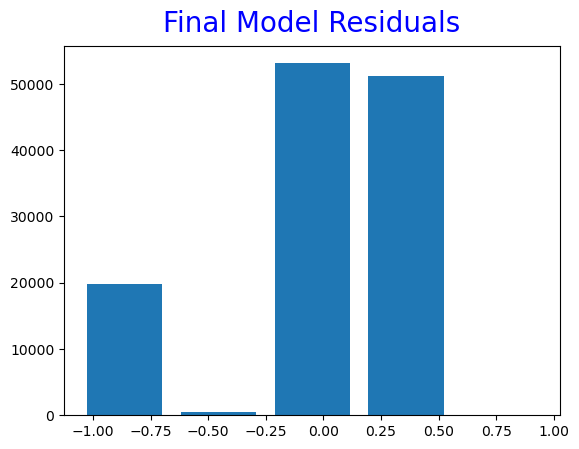

In [49]:
plt.hist(model_final.resid, rwidth=0.8, bins=5)
plt.title('Final Model Residuals', fontsize=20, pad=10, color='blue')
plt.show()